In [98]:
import pandas as pd
import numpy as np
train_merge = pd.read_csv('/Users/hazel/Documents/credit_project_data/application_train_merge_clear.csv',index_col=0)
train_merge

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANI

In [99]:
# 計算空值站欄位的百分比
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [100]:
missing_valuestable = missing_values_table(train_merge)
missing_valuestable

Your selected dataframe has 282 columns.
There are 108 columns that have missing values.


,Missing Values,% of Total Values
bureau_Start_to_End,233868,76.1
bureau_AMT_ANNUITY,227503,74.0
DRAWINGS_POS_average,220606,71.7
SK_ID_PREV_x,220606,71.7
AMT_CREDIT_LIMIT_ACTUAL_max,220606,71.7
CNT_INSTALMENT_MATURE_CUM_max,220606,71.7
SK_DPD_max,220606,71.7
DRAWINGS_ATM_average,220606,71.7
DRAWINGS_average,220606,71.7
AMT_PAYMENT_TOTAL_CURRENT_mean,220606,71.7


In [101]:
drop_miss = missing_valuestable[missing_valuestable['% of Total Values'] > 40]
drop_col = list(drop_miss.index)

In [102]:
train_merge = train_merge.drop(columns = drop_col)
train_merge

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 

In [103]:
train_merge = train_merge.drop(columns = ['EXT_SOURCE_3','EXT_SOURCE_2','bureau_CREDIT_CURRENCY3','bureau_CREDIT_CURRENCY2','bureau_CREDIT_CURRENCY1','bureau_CREDIT_CURRENCY4'])

In [104]:
missing = missing_values_table(train_merge)

Your selected dataframe has 248 columns.
There are 74 columns that have missing values.


In [105]:
drop_miss = missing[missing['% of Total Values'] > 0]
fill_median_col = list(drop_miss.index)
fill_median_col

['bureau_DAYS_ENDDATE_FACT',
 'bureau_AMT_CREDIT_SUM_LIMIT',
 'bureau_AMT_CREDIT_SUM_DEBT',
 'bureau_DAYS_CREDIT_ENDDATE',
 'bureau_AMT_CREDIT_SUM',
 'bureau_DAYS_CREDIT_UPDATE',
 'bureau_CNT_CREDIT_PROLONG',
 'bureau_CREDIT_TYPE_Cash loan (non-earmarked)',
 'bureau_CREDIT_TYPE_Car loan',
 'bureau_CREDIT_TYPE_Another type of loan',
 'bureau_AMT_CREDIT_SUM_OVERDUE',
 'bureau_SK_ID_BUREAU_counts',
 'bureau_CREDIT_TYPE_Credit card',
 'bureau_CREDIT_DAY_OVERDUE',
 'bureau_DAYS_CREDIT',
 'bureau_CREDIT_Sold',
 'bureau_CREDIT_Closed',
 'bureau_CREDIT_Bad debt',
 'bureau_CREDIT_ACTIVE',
 'bureau_CREDIT_TYPE_Consumer credit',
 'bureau_CREDIT_TYPE_Interbank credit',
 'bureau_SK_ID_CURR',
 'bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)',
 'bureau_CREDIT_TYPE_Loan for the purchase of equipment',
 'bureau_CREDIT_TYPE_Loan for working capital replenishment',
 'bureau_CREDIT_TYPE_Microloan',
 'bureau_CREDIT_TYPE_Mobile operator loan',
 'bureau_CREDIT_TYPE_Mortgage',
 'bureau_CREDIT

In [106]:
# 寫一個自動填中位數的函式
def fillnan_median (column):
    median = train_merge[column].median()
    train_merge[column] = train_merge[column].fillna(train_merge[column].median())
    result = train_merge[column].isnull().sum()
    return result,median

In [107]:
fillnan_median(fill_median_col)

(bureau_DAYS_ENDDATE_FACT                                           0
 bureau_AMT_CREDIT_SUM_LIMIT                                        0
 bureau_AMT_CREDIT_SUM_DEBT                                         0
 bureau_DAYS_CREDIT_ENDDATE                                         0
 bureau_AMT_CREDIT_SUM                                              0
 bureau_DAYS_CREDIT_UPDATE                                          0
 bureau_CNT_CREDIT_PROLONG                                          0
 bureau_CREDIT_TYPE_Cash loan (non-earmarked)                       0
 bureau_CREDIT_TYPE_Car loan                                        0
 bureau_CREDIT_TYPE_Another type of loan                            0
 bureau_AMT_CREDIT_SUM_OVERDUE                                      0
 bureau_SK_ID_BUREAU_counts                                         0
 bureau_CREDIT_TYPE_Credit card                                     0
 bureau_CREDIT_DAY_OVERDUE                                          0
 bureau_DAYS_CREDIT 

In [108]:
missing_values_table(train_merge)

Your selected dataframe has 248 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [109]:
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",1000)
train_merge.info(1000)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 248 columns):
 #    Column                                                           Dtype  
---   ------                                                           -----  
 0    SK_ID_CURR                                                       int64  
 1    TARGET                                                           float64
 2    CNT_CHILDREN                                                     int64  
 3    AMT_INCOME_TOTAL                                                 float64
 4    NAME_EDUCATION_TYPE                                              int64  
 5    REGION_POPULATION_RELATIVE                                       float64
 6    DAYS_BIRTH                                                       int64  
 7    DAYS_EMPLOYED                                                    int64  
 8    DAYS_REGISTRATION                                                float64
 9    DAYS_ID_PUBLI

In [110]:
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",1000)
np.isinf(train_merge).all()

SK_ID_CURR                                                         False
TARGET                                                             False
CNT_CHILDREN                                                       False
AMT_INCOME_TOTAL                                                   False
NAME_EDUCATION_TYPE                                                False
REGION_POPULATION_RELATIVE                                         False
DAYS_BIRTH                                                         False
DAYS_EMPLOYED                                                      False
DAYS_REGISTRATION                                                  False
DAYS_ID_PUBLISH                                                    False
FLAG_MOBIL                                                         False
FLAG_EMP_PHONE                                                     False
FLAG_WORK_PHONE                                                    False
FLAG_CONT_MOBILE                                   

In [111]:
train_merge['PREV_CRE/APP_max'] = train_merge['PREV_CRE/APP_max'].replace([np.inf, -np.inf], 0)
train_merge['PREV_CRE/APP_max'].isnull().sum()

0

In [112]:
import numpy as np
from sklearn.linear_model  import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
X_train = train_merge.iloc[:,2:]
# X_train = X_train.replace([np.inf, -np.inf], np.nan)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train

array([[-0.57753784,  0.14212925, -0.58259832, ...,  2.25919498,
         0.65105907,  0.20286334],
       [-0.57753784,  0.42679193,  1.70431177, ..., -0.40237622,
        -0.32713555,  0.20286334],
       [-0.57753784, -0.4271961 , -0.58259832, ..., -0.40237622,
        -0.81623285, -2.70162999],
       ...,
       [-0.57753784, -0.06662338,  1.70431177, ...,  0.92840938,
        -0.32713555,  0.20286334],
       [-0.57753784,  0.00928667, -0.58259832, ...,  0.04121898,
        -1.06078151,  0.20286334],
       [-0.57753784, -0.04764587,  1.70431177, ...,  4.47717099,
         1.38470503,  0.20286334]])

In [113]:
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",1000)
train_merge = train_merge.drop(columns=['FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'AMT_REQ_CREDIT_BUREAU_DAY', 'CODE_GENDER_XNA', 'NAME_TYPE_SUITE_Group of people', 'NAME_TYPE_SUITE_Other_A', 'NAME_INCOME_TYPE_Businessman', 'NAME_INCOME_TYPE_Maternity leave', 'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Unemployed', 'NAME_FAMILY_STATUS_Unknown', 'NAME_HOUSING_TYPE_Co-op apartment', 'OCCUPATION_TYPE_HR staff', 'OCCUPATION_TYPE_IT staff', 'OCCUPATION_TYPE_Realty agents', 'OCCUPATION_TYPE_Secretaries', 'OCCUPATION_TYPE_Waiters/barmen staff', 'ORGANIZATION_TYPE_Advertising', 'ORGANIZATION_TYPE_Cleaning', 'ORGANIZATION_TYPE_Culture', 'ORGANIZATION_TYPE_Electricity', 'ORGANIZATION_TYPE_Emergency', 'ORGANIZATION_TYPE_Hotel', 'ORGANIZATION_TYPE_Industry: type 1', 'ORGANIZATION_TYPE_Industry: type 10', 'ORGANIZATION_TYPE_Industry: type 12', 'ORGANIZATION_TYPE_Industry: type 13', 'ORGANIZATION_TYPE_Industry: type 2', 'ORGANIZATION_TYPE_Industry: type 4', 'ORGANIZATION_TYPE_Industry: type 5', 'ORGANIZATION_TYPE_Industry: type 6', 'ORGANIZATION_TYPE_Industry: type 7', 'ORGANIZATION_TYPE_Industry: type 8', 'ORGANIZATION_TYPE_Insurance', 'ORGANIZATION_TYPE_Legal Services', 'ORGANIZATION_TYPE_Mobile', 'ORGANIZATION_TYPE_Realtor', 'ORGANIZATION_TYPE_Religion', 'ORGANIZATION_TYPE_Telecom', 'ORGANIZATION_TYPE_Trade: type 1', 'ORGANIZATION_TYPE_Trade: type 4', 'ORGANIZATION_TYPE_Trade: type 5', 'ORGANIZATION_TYPE_Trade: type 6', 'ORGANIZATION_TYPE_Transport: type 1', 'ORGANIZATION_TYPE_Transport: type 3', 'ORGANIZATION_TYPE_University', 'HOUSETYPE_MODE_specific housing', 'HOUSETYPE_MODE_terraced house', 'NAN', 'Cashless from the account of the employer', 'PORTFOLIO_Cars', 'bureau_CREDIT_Bad debt', 'bureau_CREDIT_TYPE_Another type of loan', 'bureau_CREDIT_TYPE_Cash loan (non-earmarked)', 'bureau_CREDIT_TYPE_Interbank credit', 'bureau_CREDIT_TYPE_Loan for business development', 'bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)', 'bureau_CREDIT_TYPE_Loan for the purchase of equipment', 'bureau_CREDIT_TYPE_Loan for working capital replenishment', 'bureau_CREDIT_TYPE_Mobile operator loan', 'bureau_CREDIT_TYPE_Real estate loan', 'bureau_CREDIT_TYPE_Unknown type of loan'] )
train_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 186 entries, SK_ID_CURR to FLAG_DOCUMENT_RATIO
dtypes: bool(1), float64(76), int64(109)
memory usage: 436.7 MB


In [114]:
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",1000)
train_merge.info(1000)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 186 columns):
 #    Column                                    Dtype  
---   ------                                    -----  
 0    SK_ID_CURR                                int64  
 1    TARGET                                    float64
 2    CNT_CHILDREN                              int64  
 3    AMT_INCOME_TOTAL                          float64
 4    NAME_EDUCATION_TYPE                       int64  
 5    REGION_POPULATION_RELATIVE                float64
 6    DAYS_BIRTH                                int64  
 7    DAYS_EMPLOYED                             int64  
 8    DAYS_REGISTRATION                         float64
 9    DAYS_ID_PUBLISH                           int64  
 10   FLAG_EMP_PHONE                            int64  
 11   FLAG_WORK_PHONE                           int64  
 12   FLAG_PHONE                                int64  
 13   FLAG_EMAIL                                

In [115]:
train_merge = train_merge.drop(columns=['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','ORGANIZATION_TYPE_Business Entity Type 1','ORGANIZATION_TYPE_Business Entity Type 2','ORGANIZATION_TYPE_Business Entity Type 3','ORGANIZATION_TYPE_Industry: type 11','ORGANIZATION_TYPE_Industry: type 3','ORGANIZATION_TYPE_Industry: type 9','ORGANIZATION_TYPE_Trade: type 2','ORGANIZATION_TYPE_Trade: type 3','ORGANIZATION_TYPE_Trade: type 7','ORGANIZATION_TYPE_Transport: type 2','ORGANIZATION_TYPE_Transport: type 4','NAME_TYPE_SUITE_Other_B','REGION_POPULATION_RELATIVE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','DAYS_EMPLOYED_ANOM'])

In [116]:
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",1000)
train_merge.info(1000)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 168 columns):
 #    Column                                    Dtype  
---   ------                                    -----  
 0    SK_ID_CURR                                int64  
 1    TARGET                                    float64
 2    CNT_CHILDREN                              int64  
 3    AMT_INCOME_TOTAL                          float64
 4    NAME_EDUCATION_TYPE                       int64  
 5    DAYS_BIRTH                                int64  
 6    DAYS_EMPLOYED                             int64  
 7    DAYS_REGISTRATION                         float64
 8    DAYS_ID_PUBLISH                           int64  
 9    FLAG_EMP_PHONE                            int64  
 10   FLAG_WORK_PHONE                           int64  
 11   FLAG_PHONE                                int64  
 12   FLAG_EMAIL                                int64  
 13   CNT_FAM_MEMBERS                           

In [117]:
train_merge.to_csv('/Users/hazel/Documents/credit_project_data/application_train_merge_clear_nomissing.csv')

# ROC_AUC

/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/var/folders/dp/hcv7h_qn59b6dcz6l8v_w1z80000gn/T/ipykernel_4115/3480119633.py:7: RuntimeWarning: divide by zero encountered in log10
  scores = -np.log10(selector.pvalues_)
/var/folders/dp/hcv7h_qn59b6dcz6l8v_w1z80000gn/T/ipykernel_4115/3480119633.py:8: RuntimeWarning: invalid value encountered in true_divide
  scores /= scores.max()


ValueError: shape mismatch: objects cannot be broadcast to a single shape

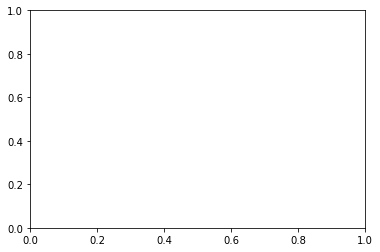

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Import some data to play with
X = train_merge.iloc[:, 2:]
y = train_merge[['TARGET']]

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True, random_state=random_state)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
 = train_merge[['TARGET']]